Website: https://pyro.ai

'Pyro is a universal **probabilistic programming language** (PPL) written in Python and supported by PyTorch on the backend. Pyro enables flexible and expressive **deep probabilistic modeling**, unifying the best of modern **deep learning** and **Bayesian modeling**'

If you are looking to use deep probabilistic modelling (VAE, Deep Markov Model,...) or look for a framework to develop your own probabilistic model, you might be interested in this.

Applications: Deep Generative Models, Time Series, Gaussian Process, Epidemiology. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks

!pip3 install pyro-ppl
!pip3 install scanpy
!pip3 install scvi-tools

**Example 1: Single Cell RNA Sequencing Analysis with VAEs**

'We use a semi-supervised deep generative model of transcriptomics data to propagate labels
from a small set of labeled cells to a larger set of unlabeled cells. In particular we
use a dataset of peripheral blood mononuclear cells (PBMC) from 10x Genomics and
(approximately) reproduce Figure 6 in reference [1].'**bold text**

References:
[1] "Harmonization and Annotation of Single-cell Transcriptomics data with Deep Generative Models,"
    Chenling Xu, Romain Lopez, Edouard Mehlman, Jeffrey Regier, Michael I. Jordan, Nir Yosef.

In [25]:
! python scanvi.py --num-epochs=5 --plot
#instead of 60 epochs

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
INFO     File data/PurifiedPBMCDataset.h5ad already downloaded                  
INFO     Using batches from adata.obs["batch"]                                  
INFO     Using labels from adata.obs["labels"]                                  
INFO     Using data from adata.X                                                
INFO     Computing library size prior per batch                                 
INFO     Successfully registered anndata object containing 42919 cells, 21932   
         vars, 4 batches, 4 labels, and 0 proteins. Also registered 0 extra     
         categorical covariates and 0 extra continuous covariates.              
INFO     Please do not further modify adata until model is trained.   

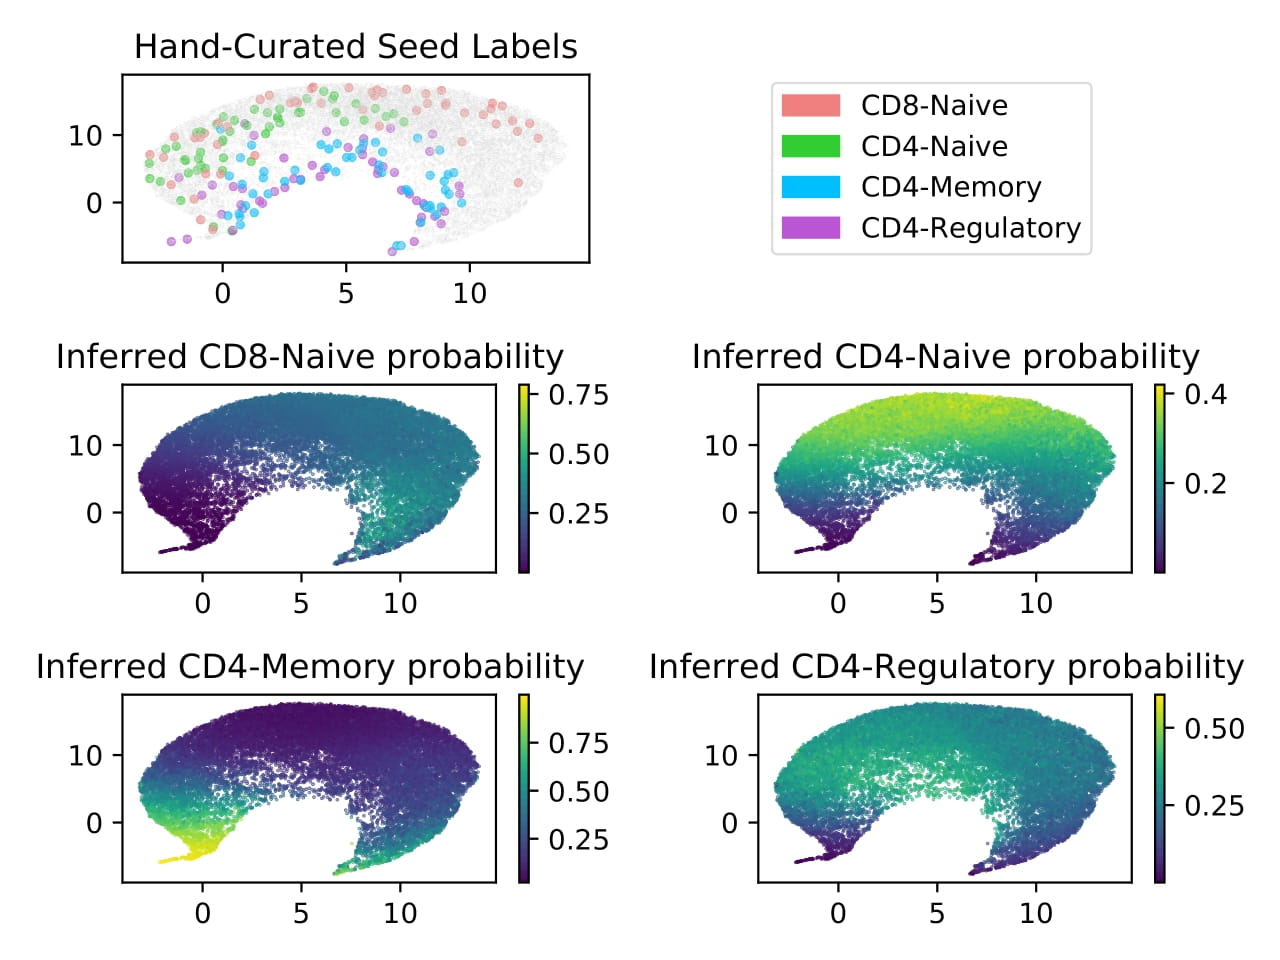

Fig 1: Seed cells are colored by their annotation (using known marker genes)

Fig 2-5: The posterior probability of each cell being one of the four T cell subtype obtained

**Example 2: Epidemiological inference via Hamiltonian Monte Carlo**

'Generate outbreak data for a population of 10000 observed for 60 days, then infer infection parameters and forecast new infections for another 30 days.' Data simulated using a *Discrete SIR Model* (population = Susceptible + Infected + Recovered).

Reference: https://github.com/pyro-ppl/pyro/blob/dev/examples/sir_hmc.py



In [24]:
! python sir_hmc.py -p 10000 -d 60 -f 30 --plot

Generating data...
Observed 708/1471 infections:
1 1 0 0 0 0 1 1 0 0 1 1 2 0 1 1 0 1 1 1 2 1 1 3 3 7 3 5 5 5 2 10 4 10 6 8 8 13 11 17 11 13 16 17 12 21 25 31 26 10 34 23 37 37 42 38 42 42 45 49
Running inference...
Sample: 100%|██| 300/300 [01:31,  3.29it/s, step size=6.41e-02, acc. prob=0.885]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
  I_aux[0]      2.48      0.75      2.32      1.39      3.51      9.98      1.00
  I_aux[1]      4.07      1.03      4.13      2.55      5.77     28.41      1.08
  I_aux[2]      5.01      0.82      5.00      3.57      6.16     22.15      1.07
  I_aux[3]      4.95      1.17      5.09      3.01      6.50     21.79      1.16
  I_aux[4]      4.67      1.07      4.68      2.85      6.13      7.16      1.14
  I_aux[5]      4.38      1.10      4.32      2.50      6.07     29.30      1.00
  I_aux[6]      5.06      0.90      5.02      3.71      6.52     24.36      1.05
  I_aux[7]      5.67      0.94      5.48      4.54    

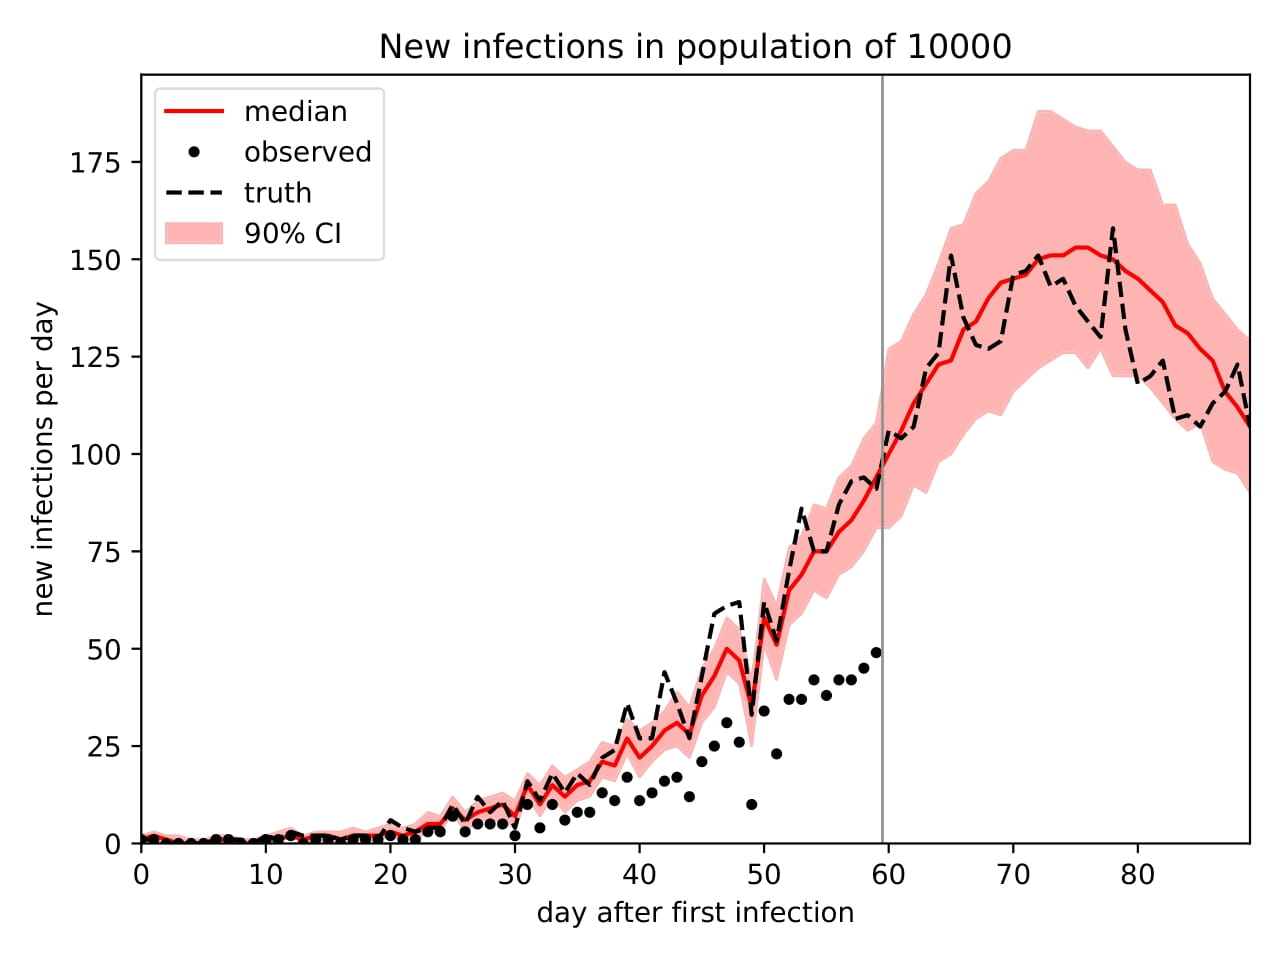